### Basic forward-design example
Demonstrate the basic input format that can be used for forward design.
Designs can have fused regions and holes, specified by the `fusedPts` and `holePts`, respectively.

The provided design doesn't do anything interesting...

In [1]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark

V, E = mesh.load_raw('data/ForwardDesign/example.obj')
fusedPts = list(np.loadtxt('data/ForwardDesign/example_fusedPts.txt').reshape((-1, 2)))
holePts  = list(np.loadtxt('data/ForwardDesign/example_holePts.txt').reshape((-1, 2)))

In [2]:
V, E = mesh.load_raw('data/ForwardDesign/hinge.obj')
fusedPts = list(np.loadtxt('data/ForwardDesign/fusehingev3.txt').reshape((-1, 2)))
holePts = []  # or load from file if you want, but it should be empty

In [3]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

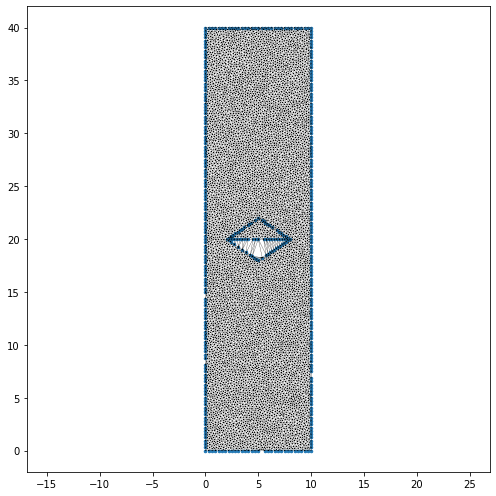

In [4]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

In [5]:
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

In [6]:
import time
benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1
framerate = 5 # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()
cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.00415492	1
Newton iterations	73.2968	1
    InflatableSheet energy	0.000341892	1
    Newton iterate	73.2758	116
        Backtracking	0.600838	115
            InflatableSheet energy	0.106758	175
            InflatableSheet setVars	0.484678	175
        Compute descent direction	70.7503	115
            Negative curvature dir	0.195813	3
                negativeCurvatureDirection	0.187876	3
                    CHOLMOD Backsub	0.130142	51
                    CHOLMOD Numeric Factorize	0.00347686	3
                    CHOLMOD Symbolic Factorize	0.0301762	3
            newton_step	70.5536	115
                Newton solve	67.6064	202
                    CHOLMOD Numeric Factorize	65.4981	201
                    Solve	1.2439	116
                        CHOLMOD Backsub	0.940858	115
                        CHOLMOD Numeric Factorize	0.078265	1
                        CHOLMOD Symbolic Factorize	0.208502	1
                hessEval	2.81394	115
                largestMagnitudeEig


## 🧪 TPU-Coated Ripstop Nylon Simulation at 26 kPa

This section simulates an inflatable structure made of 70D heat-sealable TPU-coated ripstop nylon.
We assume typical values for coated fabric:
- Young’s modulus ≈ 250 MPa
- Thickness ≈ 0.15 mm
- Internal pressure = 26 kPa


In [10]:
# Simulating TPU-coated nylon: E = 250 MPa, t = 0.15 mm, p = 26 kPa
# Scale pressure to match mechanical behavior of thinner, softer material
# p_scaled = 26e3 * (3e8 * 0.001) / (2.5e8 * 0.00015) = ~208000 Pa
isheet.pressure = 208000


In [13]:
cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)


In [18]:
dir(isheet)


['EnergyType',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'airChannelIndices',
 'cauchyGreenDeformationTensors',
 'deformationGradient3D',
 'deformedAreas',
 'deformedWallVertexPositions',
 'disableFusedRegionTensionFieldTheory',
 'energy',
 'fusedRegionBooleanIntersectSheetBoundary',
 'getDeformedVtxPosition',
 'getFusingPolylines',
 'getVars',
 'gradient',
 'hessian',
 'hessianSparsityPattern',
 'isWallTri',
 'isWallVtx',
 'mesh',
 'numSheetTris',
 'numVars',
 'numWallVertices',
 'pressure',
 'referenceVolume',
 'restWallVertexPositions',
 'rigidMotionPinVars',
 'setIdentityDeformation',
 'setMaterial',
 'setRelaxedStiffnessEpsilon',
 'setRestVertexPosition

In [20]:
isheet.visualizationGeometry()


(array([[-1.8808830e-01, -3.4971552e+00, -5.5951166e-01],
        [-2.4292059e+00,  1.2097334e+00,  7.5372891e+00],
        [ 8.2499182e-01, -3.5749507e+00, -1.0781182e+00],
        ...,
        [ 1.7674744e+01,  2.7589791e+00, -9.7458204e-03],
        [ 1.8152262e+01,  1.6473875e+00, -6.7612706e-03],
        [ 1.7900091e+01,  2.1999767e+00, -8.4796436e-03]], dtype=float32),
 array([[    0,    33,  7118],
        [    1,  1269,  1711],
        [    2,   116,   110],
        ...,
        [10354,  9845, 15323],
        [14848, 10354, 15323],
        [15323, 14992,  8839]], dtype=uint32),
 array([[-0.8051193 ,  0.00651908, -0.5930771 ],
        [-0.9582842 ,  0.23647426,  0.16053464],
        [-0.08705021, -0.39230734, -0.91570586],
        ...,
        [ 0.9327765 ,  0.35295457,  0.07315101],
        [ 0.8976947 ,  0.42963982,  0.09774364],
        [ 0.91964114,  0.38697657,  0.0671518 ]], dtype=float32))

In [25]:
e0 = isheet.triEnergyDensities()[0]
dir(e0)


['PK2Stress',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'delta_denergy',
 'denergy',
 'eigSensitivities',
 'energy',
 'relaxedStiffnessEpsilon',
 'setF',
 'stiffness',
 'tensionState',
 'useTensionField']

In [27]:
raw_energy = isheet.triEnergyDensities()
energy_array = np.array([e.energy() for e in raw_energy], dtype=np.float64).reshape(-1, 1)

# Map to visualization mesh
visual_field = isheet.visualizationField(energy_array)


In [31]:
viewer = Viewer(isheet)
viewer.show()


Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

In [32]:
help(Viewer)


Help on class TriMeshViewer in module tri_mesh_viewer:

class TriMeshViewer(Viewer)
 |  TriMeshViewer(trimesh, width=512, height=512, textureMap=None, scalarField=None, vectorField=None, superView=None, transparent=False, wireframe=False)
 |  
 |  Triangle meshes just use the generic viewer as-is...
 |  
 |  Method resolution order:
 |      TriMeshViewer
 |      Viewer
 |      vis.pythreejs_viewer.PythreejsViewerBase
 |      vis.viewer_base.ViewerBase
 |      builtins.object
 |  
 |  Methods inherited from Viewer:
 |  
 |  __init__(self, trimesh, width=512, height=512, textureMap=None, scalarField=None, vectorField=None, superView=None, transparent=False, wireframe=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from vis.pythreejs_viewer.PythreejsViewerBase:
 |  
 |  __del__(self)
 |  
 |  allocatePointsMaterial(self)
 |      # Allocate a wireframe materia

In [40]:
dir(mesh)


['MSHFieldParser',
 'MSHFieldParser2',
 'MSHFieldParser3',
 'MSHFieldWriter',
 'Mesh',
 'PeriodicCondition',
 'PeriodicCondition2D',
 'PeriodicCondition3D',
 'PolygonSetTriangulation',
 'VoxelBoundaryMesh',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'detail',
 'load_raw',
 'save']

In [44]:
F = np.array(F)
if F.ndim == 0:
    F = F.item()  # Extract actual object
F = np.asarray(F)


In [46]:
F_raw = isheet.visualizationMesh()
print("F_raw type:", type(F_raw))
try:
    print("F_raw shape:", F_raw.shape)
except:
    print("Not a NumPy array")


F_raw type: <class 'mesh.detail.Linear3DTriMesh'>
Not a NumPy array


In [51]:
# Extract from isheet directly
raw_mesh = isheet.mesh

In [54]:
print("raw_mesh type:", type(raw_mesh))
print("raw_mesh dir():")
for name in dir(raw_mesh):
    if not name.startswith("__"):
        print("  ", name)


raw_mesh type: <class 'method'>
raw_mesh dir():


In [55]:
raw_mesh = isheet.mesh()  # ← with parentheses!


In [58]:
geom = isheet.visualizationGeometry()
print("Type:", type(geom))
print("Attributes:", dir(geom))


Type: <class 'tuple'>
Attributes: ['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index']


In [61]:
geometry = isheet.visualizationGeometry()
print("Returned items:", len(geometry))
print("Types:", [type(x) for x in geometry])


Returned items: 3
Types: [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]


In [62]:
V_raw, F_raw, *_ = isheet.visualizationGeometry()


In [63]:
V = np.array([v.flatten() for v in V_raw], dtype=np.float64)
F = np.array(F_raw, dtype=np.int32)


In [64]:
def write_obj(path, V, F):
    with open(path, "w") as f:
        for v in V:
            f.write("v {:.6f} {:.6f} {:.6f}\n".format(*v))
        for face in F:
            f.write("f {} {} {}\n".format(*(face + 1)))  # OBJ is 1-indexed

write_obj("inflated_TPU_26kPa_scaled.obj", V, F)


In [ ]:
# === Export inflated mesh to .obj ===

# Step 1: Extract geometry (V = vertices, F = faces)
V_raw, F_raw, *_ = isheet.visualizationGeometry()

# Convert to NumPy arrays
V = np.array([v.flatten() for v in V_raw], dtype=np.float64)
F = np.array(F_raw, dtype=np.int32)

# Step 2: Export as .obj
def write_obj(path, V, F):
    with open(path, "w") as f:
        for v in V:
            f.write("v {:.6f} {:.6f} {:.6f}\n".format(*v))
        for face in F:
            f.write("f {} {} {}\n".format(*(face + 1)))  # OBJ is 1-indexed

# Define filename
filename = "inflated_TPU_26kPa_scaled.obj"

# Save to file
write_obj(filename, V, F)

# Optional: confirm file exists
import os
print(f"Mesh exported to: {filename}") if os.path.exists(filename) else print("Export failed.")


In [65]:
tracked_index = 42  # or any valid vertex index


In [66]:
X_i = isheet.restWallVertexPositions()[tracked_index].flatten()


In [67]:
x_i = isheet.deformedWallVertexPositions()[tracked_index].flatten()


In [68]:
print("Vertex", tracked_index)
print("Rest position:     ", X_i)
print("Deformed position: ", x_i)


Vertex 42
Rest position:      [ 4.16506287 21.44337525  0.        ]
Deformed position:  [ 1.24067982 -0.54183262 -0.26774251]


In [69]:
# Indices of points to track
tracked_indices = [10, 42, 88]

# Dictionary to store position history
trajectory = {i: [] for i in tracked_indices}


In [70]:
def track_cb(it):
    for i in tracked_indices:
        pos = isheet.deformedWallVertexPositions()[i].flatten()
        trajectory[i].append(pos.copy())


In [71]:
def combined_cb(it):
    if it % 5 == 0:
        viewer.update()
    track_cb(it)

# Run inflation
cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=combined_cb)


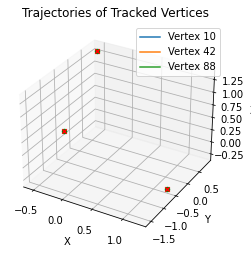

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label=f'Vertex {idx}')
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2], c='green', marker='o')  # start
    ax.scatter(traj[-1, 0], traj[-1, 1], traj[-1, 2], c='red', marker='x')  # end

ax.set_title("Trajectories of Tracked Vertices")
ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [73]:
# Target positions you want to track
target_points = np.array([[5.0, 0.0, 0.0], 
                          [5.0, 20.0, 0.0], 
                          [5.0, 40.0, 0.0]])

# Get rest (uninflated) vertex positions
V_rest = np.array([v.flatten() for v in isheet.restWallVertexPositions()])

# Find closest mesh vertex to each target
from scipy.spatial import KDTree
tree = KDTree(V_rest)
tracked_indices = [tree.query(p)[1] for p in target_points]

print("Tracked vertex indices:", tracked_indices)


Tracked vertex indices: [184, 294, 237]


In [74]:
# Global dict to store the positions over time
trajectory = {idx: [] for idx in tracked_indices}

def cb(it):
    for idx in tracked_indices:
        pos = isheet.getDeformedVtxPosition(idx, 0).flatten()
        trajectory[idx].append(pos)
    if it % 5 == 0:
        viewer.update()


In [77]:
for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    print(f"Vertex {idx} trajectory shape: {traj.shape}")


Vertex 184 trajectory shape: (0,)
Vertex 294 trajectory shape: (0,)
Vertex 237 trajectory shape: (0,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


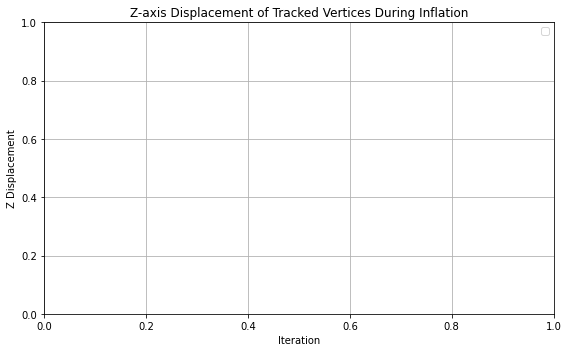

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Example: Inside your `cb(it)` function
for idx in tracked_indices:
    pos = isheet.getDeformedVtxPosition(idx, 0).flatten()  # shape (3,)
    trajectory[idx].append(pos)



plt.xlabel("Iteration")
plt.ylabel("Z Displacement")
plt.title("Z-axis Displacement of Tracked Vertices During Inflation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
def cb(it):
    print(f"Callback called at iteration {it}")
    for idx in tracked_indices:
        pos = isheet.getDeformedVtxPosition(idx, 0).flatten()
        trajectory[idx].append(pos)
    if it % 5 == 0:
        viewer.update()


In [81]:
for idx in tracked_indices:
    print(f"Vertex {idx}: {len(trajectory[idx])} points tracked.")


Vertex 184: 1 points tracked.
Vertex 294: 1 points tracked.
Vertex 237: 1 points tracked.


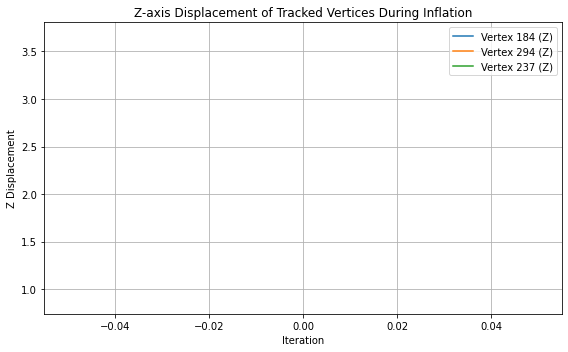

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] == 0:
        continue  # skip empty
    plt.plot(range(len(traj)), traj[:, 2], label=f"Vertex {idx} (Z)")

plt.xlabel("Iteration")
plt.ylabel("Z Displacement")
plt.title("Z-axis Displacement of Tracked Vertices During Inflation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


InflatableSheet setVars	0.0159769	1
Newton iterations	0.00248599	1
    InflatableSheet energy	0.000394106	1
    Newton iterate	0.00178599	1
        Preamble	0.00178194	1
            Callback	1.40667e-05	1
            InflatableSheet energy	0.000520945	1
            InflatableSheet gradient	0.000981092	1
Full time	0.11327


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


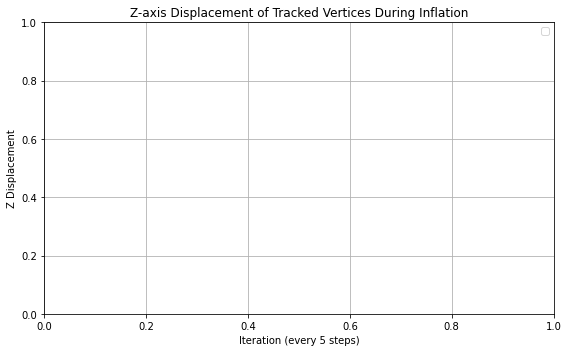

In [85]:
# ---- CONFIGURATION ----
import numpy as np
import matplotlib.pyplot as plt

# Define vertices you want to track, using approximate (x, y, z) rest positions
target_points = np.array([
    [5.0,  0.0, 0.0],
    [5.0, 20.0, 0.0],
    [5.0, 40.0, 0.0]
])

# Find closest actual mesh vertices to those target positions
from scipy.spatial import KDTree
V_rest = np.array([v.flatten() for v in isheet.restWallVertexPositions()])
tree = KDTree(V_rest)
tracked_indices = [tree.query(p)[1] for p in target_points]

# ---- TRACKING SETUP ----
trajectory = {idx: [] for idx in tracked_indices}
framerate = 5  # save every 5 iterations

def cb(it):
    if it % framerate == 0:
        for idx in tracked_indices:
            pos = isheet.getDeformedVtxPosition(idx, 0).flatten()
            trajectory[idx].append(pos)
        viewer.update()

# ---- RUN SIMULATION ----
import time
benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)

opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

# ---- PLOT RESULTS ----
plt.figure(figsize=(8, 5))
for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] > 1:
        plt.plot(range(len(traj)), traj[:, 2], label=f"Vertex {idx} (Z)")

plt.xlabel("Iteration (every {} steps)".format(framerate))
plt.ylabel("Z Displacement")
plt.title("Z-axis Displacement of Tracked Vertices During Inflation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
# --- Create viewer (Offscreen) ---
from tri_mesh_viewer import OffscreenTriMeshViewer

oview = OffscreenTriMeshViewer(isheet, width=768, height=640, wireframe=True)


Tracking vertices: [184, 294, 237]
InflatableSheet setVars	0.0210471	1
Newton iterations	69.7221	1
    InflatableSheet energy	0.000559092	1
    Newton iterate	69.7211	78
        Backtracking	0.335668	77
            InflatableSheet energy	0.0554788	81
            InflatableSheet setVars	0.275379	81
        Compute descent direction	66.7162	78
            newton_step	66.7141	78
                Newton solve	64.331	340
                    CHOLMOD Numeric Factorize	61.848	339
                    Solve	1.32217	78
                        CHOLMOD Backsub	1.04023	77
                        CHOLMOD Numeric Factorize	0.0747118	1
                        CHOLMOD Symbolic Factorize	0.191041	1
                hessEval	2.25333	78
                largestMagnitudeEigenvalue	0.08585	4
        Preamble	2.64271	78
            Callback	2.47822	78
            InflatableSheet energy	0.0436392	78
            InflatableSheet gradient	0.104238	78
Full time	69.8055


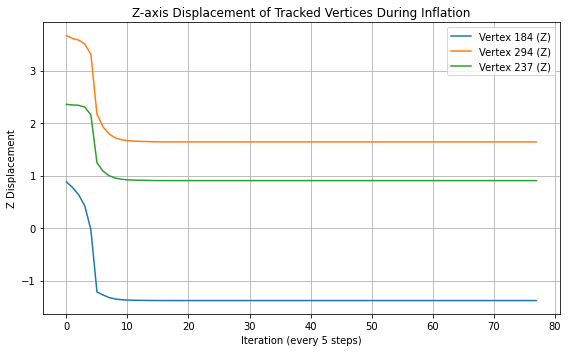

In [89]:
# ---- Inflation + Vertex Tracking + Video Recording ----

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import benchmark

# ---- Set up target points and tracking ----
target_points = np.array([
    [5.0,  0.0, 0.0],   # Bottom
    [5.0, 20.0, 0.0],   # Middle
    [5.0, 40.0, 0.0]    # Top
])

# Rest positions for KDTree matching
V_rest = np.array([v.flatten() for v in isheet.restWallVertexPositions()])
tree = KDTree(V_rest)
tracked_indices = [tree.query(p)[1] for p in target_points]
trajectory = {idx: [] for idx in tracked_indices}
print("Tracking vertices:", tracked_indices)

# ---- Set up optimizer options ----
# ---- Set up optimizer options ----
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 1000  # Number of iterations only — other tolerances not exposed

isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
isheet.pressure = 10

# ---- Callback for tracking and update ----
framerate = 5  # Update viewer every N steps
def cb(it):
    for idx in tracked_indices:
        pos = isheet.getDeformedVtxPosition(idx, 0).flatten()
        trajectory[idx].append(pos)
    if it % framerate == 0:
        oview.update()

# ---- Run inflation and record video ----
benchmark.reset()
oview.recordStart('tracked_inflation.mp4')
cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()
oview.recordStop()

# ---- Plot Z-displacement over time ----
plt.figure(figsize=(8, 5))
for idx in tracked_indices:
    traj = np.array(trajectory[idx])
    if traj.shape[0] <= 1:
        continue
    plt.plot(range(len(traj)), traj[:, 2], label=f"Vertex {idx} (Z)")
plt.xlabel("Iteration (every {} steps)".format(framerate))
plt.ylabel("Z Displacement")
plt.title("Z-axis Displacement of Tracked Vertices During Inflation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
